In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy 
import time
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csr_matrix
from io import StringIO
from sklearn.datasets import make_blobs
import warnings
from mst_clustering import MSTClustering
from amplpy import AMPL
warnings.filterwarnings('ignore')

0
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 3.379151911
7 simplex iterations
1 branching nodes
 
1
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 9.136363341
20 simplex iterations
1 branching nodes
 
2
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 12.11057573
49 simplex iterations
1 branching nodes
 
3
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 18.81133385
95 simplex iterations
1 branching nodes
 
4
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 26.32381949
126 simplex iterations
1 branching nodes
 
5
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 35.71498679
171 simplex iterations
1 branching nodes
 
6
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 41.23369352
234 simplex iterations
1 branching nodes
 
7
solving...
HiGHS 1.5.3:HiGHS 1.5.3: optimal solution; objective 46.16073581
298 simplex iterations
1 branching nodes
 
8
solving...
HiGHS 1.5.3:HiGHS 1.5.3:

Text(0, 0.5, 'Time (in seconds)')

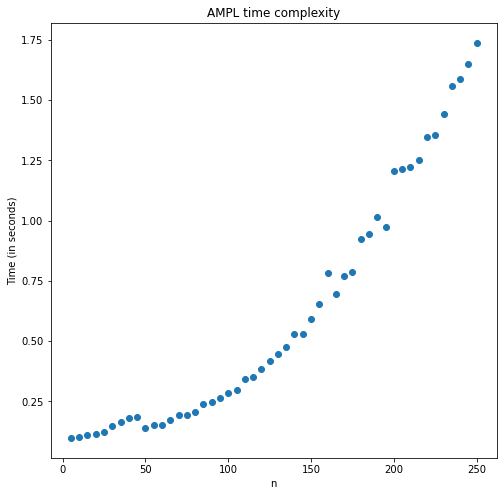

In [3]:
k = 3

#initialization plot vectors
Xplot = []
Yplot = []
for it in range(50):
    print(it)
    # generate data
    m = 5*(it+1)
    
    random_state = 170
    points, y = make_blobs(n_samples=m,centers = k, random_state=random_state)
    
    #generate matrix distance
    dist = [[math.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2) for i in points] for j in points]

    #We write the generated data in a .dat AMPL format.
    output = open("Kcluster.dat", "w")
    output.write('param k:= '+ str(k) + ';')
    output.write('\n')
    output.write('param m:= '+ str(m) + ';')
    output.write('\n')
    output.write('param d: ')
    for i in range(m):output.write(str(i + 1) + ' ')
    output.write(':=')
    output.write('\n')
    for i in range(m):
        output.write(str(i + 1) + ' ')
        for j in range(m):
            output.write(str(dist[i][j]))
            if(j != m-1):output.write(' ')
        if(i != m-1):output.write('\n')
    output.write(';')
    output.write('\n')
    output.close()
    
    #ampl solving
    ampl = AMPL()
    ampl.read("Kcluster.mod")
    ampl.read_data("Kcluster.dat")
    ampl.option["solver"] = "highs"
    start = time.time()
    print("solving...")
    ampl.solve()
    
    end = time.time()
    Xplot.append(m)
    Yplot.append(end-start)
#plotting
plt.figure(figsize=(8, 8))
plt.scatter(Xplot,Yplot)
plt.title("AMPL time complexity")
plt.xlabel("n")
plt.ylabel("Time (in seconds)")

Text(0, 0.5, 'Time (in seconds)')

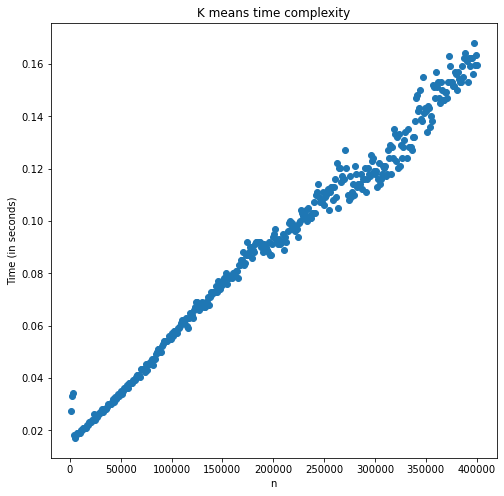

In [16]:
#KMeans time complexity
k = 3

#initialization plot vectors
Xplot = []
Yplot = []

for i in range(400):
    #paremeter selection
    m = (1000)*(i+1)
    Xplot.append(m)
    #generating points
    random_state = 42
    points, y = make_blobs(n_samples=m,centers = k, random_state=random_state)

    #Kmeans solution
    random_state = 170
    start = time.time()
    y_pred = KMeans(n_clusters=k, random_state=random_state,n_init='auto').fit_predict(points)
    end = time.time()

    Yplot.append(end - start)
    #plotting
plt.figure(figsize=(8, 8))
plt.scatter(Xplot,Yplot)
plt.title("K means time complexity")
plt.xlabel("n")
plt.ylabel("Time (in seconds)")

Text(0, 0.5, 'Time (in seconds)')

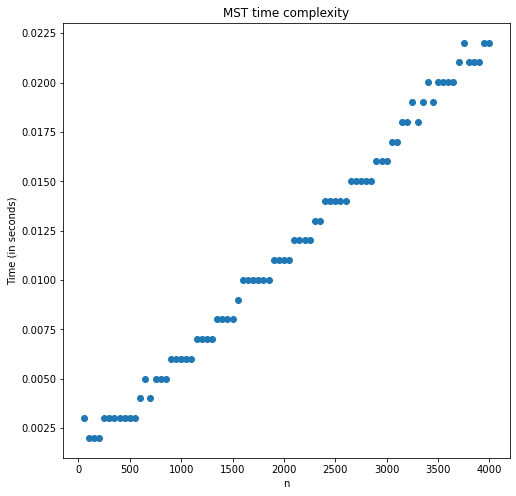

In [11]:
#MST time complexity
k = 3
model = MSTClustering(cutoff=k-1)

#initialization plot vectors
Xplot = []
Yplot = []

for i in range(80):
    #paremeter selection
    
    m = (50)*(i+1)
    Xplot.append(m)
    #generating points
    random_state = 42
    points, y = make_blobs(n_samples=m,centers = k, random_state=random_state)


    #MST solution
    random_state = 170
    start = time.time()
    y_pred_mst = model.fit_predict(points)
    end = time.time()
    Yplot.append(end - start)

#plotting
plt.figure(figsize=(8, 8))
plt.scatter(Xplot,Yplot)
plt.title("MST time complexity")
plt.xlabel("n")
plt.ylabel("Time (in seconds)")